In [1]:
import numpy as np
import pandas as pd
from pandas.core.frame import DataFrame
import json 

from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder

from eis_preprocessing import eis_dataframe_from_csv
from eis_preprocessing import process_batch_element_f
from eis_preprocessing import process_batch_element_zreal
from eis_preprocessing import process_batch_element_zimag
from eis_preprocessing import exclude_outlier

from utils import plot_freq_range
from utils import umap_plots

/Users/joachim/opt/anaconda3/envs/eis-battmen/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Load the csv into a data frame.
df = eis_dataframe_from_csv("data/train_data_newspl.csv")
df_test = eis_dataframe_from_csv("data/test_data_newspl.csv")
df.shape

(7462, 4)

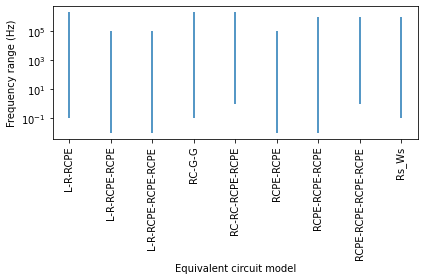

['L-R-RCPE' 'L-R-RCPE-RCPE' 'L-R-RCPE-RCPE-RCPE' 'RC-G-G'
 'RC-RC-RCPE-RCPE' 'RCPE-RCPE' 'RCPE-RCPE-RCPE' 'RCPE-RCPE-RCPE-RCPE'
 'Rs_Ws'] [ 9  4 15 23  3  0  5  8 13]
Maximal minimum freq: 10.0, minimal maximum freq: 100000.0


In [3]:
plot_freq_range(df, save=0)

In [4]:
def interpolate_to_freq_range(df):
    ## Interpolate onto the largest frequency union to prevent data leakage
    interpolated_basis = np.geomspace(10, 1e5, num=30)

    df["f"] = df.apply(lambda x: process_batch_element_f(interpolated_basis), axis=1)
    df["zreal"] = df.apply(
        lambda x: process_batch_element_zreal(x.freq, x.Z, interpolated_basis), axis=1
    )
    df["zimag"] = df.apply(
        lambda x: process_batch_element_zimag(x.freq, x.Z, interpolated_basis), axis=1
    )

    # Sort the data frame to get the circuit names in alphabetical order
    df_sorted = df.sort_values(by=["Circuit"])
    return df_sorted

def save_interpolated_encoded(df_sorted, filename, load_mapping=0, save_mapping=0):
    y_classication = np.array(df_sorted['Circuit'])
    # Encode the circuit names as integers 
    if load_mapping==0:
        le = LabelEncoder()
        y_classication_encoded = le.fit_transform(y_classication)
        # le_name_mapping = dict(zip([int(le.transform(le.classes_)[i]) for i in range(len(le.classes_))], le.classes_))
        # print(le_name_mapping)
    else:
        # Load the mapping from the json file
        with open('data/le_name_mapping.json', 'r') as f:
            mapping = json.load(f)
            le = LabelEncoder()
        le.classes_ = np.array([mapping[str(i)] for i in range(len(mapping))])
        y_classication_encoded = le.transform(y_classication)
        # le_name_mapping = dict(zip([int(le.transform(le.classes_)[i]) for i in range(len(le.classes_))], le.classes_))
        # print(le_name_mapping)
            
    if save_mapping:
        # Store the mapping from integer to circuit name
        le_name_mapping = dict(zip([int(le.transform(le.classes_)[i]) for i in range(len(le.classes_))], le.classes_))
        print(le_name_mapping)
        # Save python dictionary to json file
        with open('data/le_name_mapping.json', 'w') as fp:
            json.dump(le_name_mapping, fp)


In [6]:
df_sorted = interpolate_to_freq_range(df)
df_test_sorted = interpolate_to_freq_range(df_test)

In [7]:
df_sorted, df_test_sorted = exclude_outlier(df_sorted, df_test_sorted)

[ 694  770  846 2261 3925 4385 4661 6481 7122 7150]
[ 232  340 1014 1107 1464]
Train data: 7462 spectra
Train data: 7452 spectra after outliers removed
Test data: 1865 spectra
Test data: 1860 spectra after outliers removed


NameError: name 'real_means' is not defined

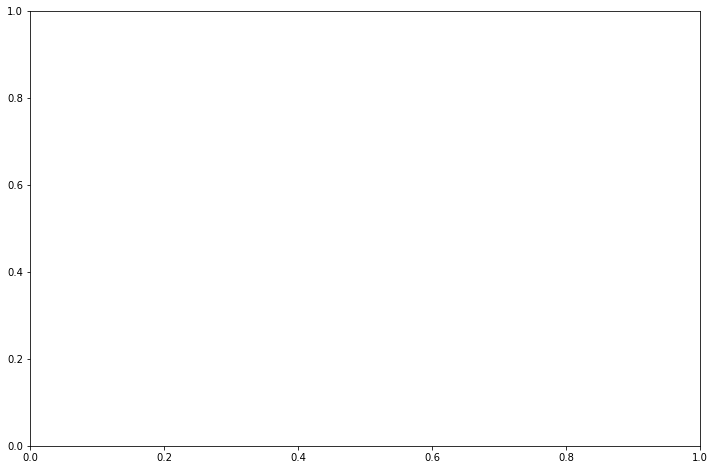

In [8]:
import seaborn as sns

# real_means
# Boxplot of ream_means
fig, ax = plt.subplots(figsize=(12, 8))
sns.boxplot(x=real_means, ax=ax)
ax.set_xlabel("Real Means")

# imag_means
# Boxplot of imag_means
fig, ax = plt.subplots(figsize=(12, 8))
sns.boxplot(x=imag_means, ax=ax)

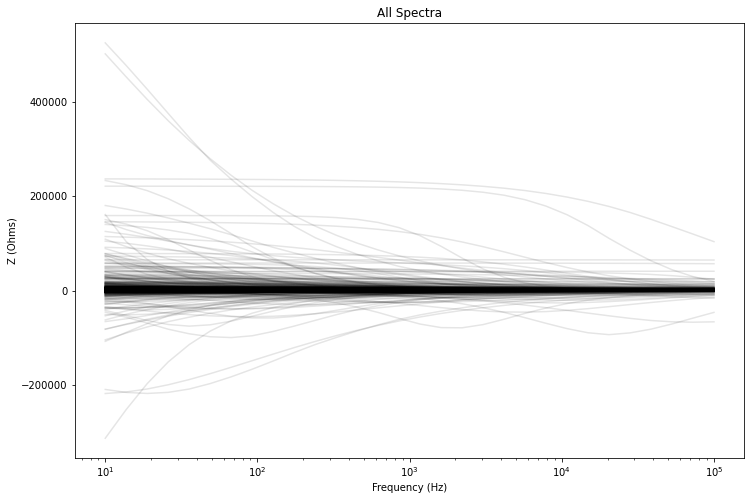

In [ ]:
plot_all_spectra(df_test_sorted, save=0)

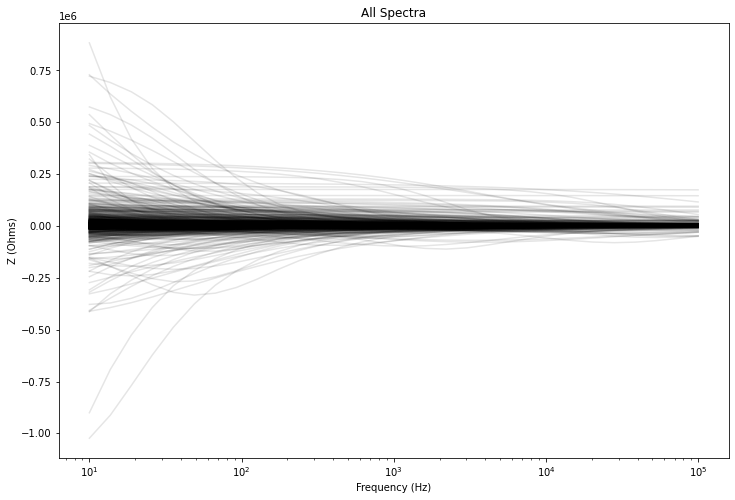

In [ ]:
plot_all_spectra(df_sorted, save=0)

In [ ]:
df = preprocess_data(d_path + "train_data_newspl.csv")

# For tsfresh we need to 'unwrap' all the measurements into a dataframe with measurement ids, freq, zreal, and zimag columns
df_ts = unwrap_df(df)

In [ ]:
# Write function to exclude outliers 
def exclude_outliers(df, zreal_threshold=0.1, zimag_threshold=0.1):
    

In [ ]:
with open(f"data/le_name_mapping.json", "r") as f:
    label_dict = json.load(f)
le = LabelEncoder()
classes = np.array([label_dict[str(i)] for i in range(9)])
le.classes_ = classes

KeyError: '0'

OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


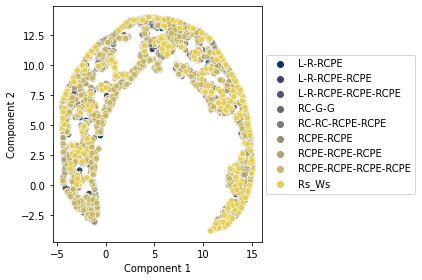

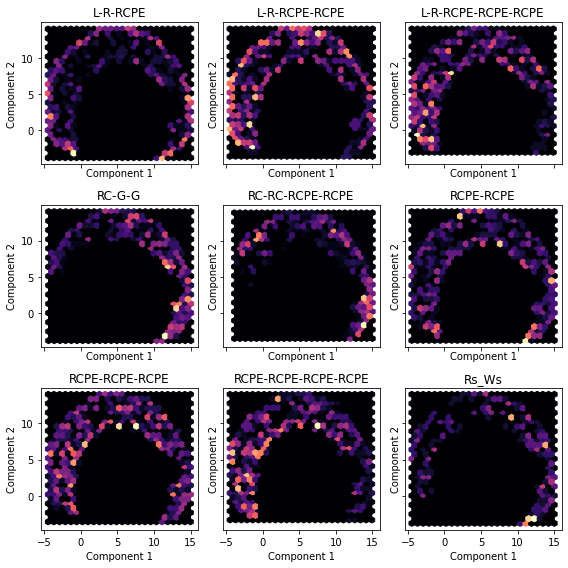

In [ ]:
# Umap random state fixed (plots differ slightly from publication, because the seed was previously not fixed).
umap_plots(df_sorted)